In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from astropy.timeseries import LombScargle
import astropy.units as u
import matplotlib.ticker as ticker

%matplotlib inline

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 20
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.width'] = 3
plt.rcParams['xtick.major.size']  = 14 #12
plt.rcParams['ytick.major.size']  = 14#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams

plt.rcParams['axes.linewidth'] = 3

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec

figaspectratio = 1.25

In [2]:
belton=pd.read_csv("../Lightcurves/Photometry/1I_2017U1_lightcurve.csv",comment='#')

beltime=belton['corrMMJD'].to_numpy()
belmag=belton['corrm'].to_numpy()
belsig=belton['sigma'].to_numpy()
belalpha=belton['aPh'].to_numpy()

belton=np.array([beltime,belmag,belsig]).T

cutoff=78
octbeltime=beltime[beltime<cutoff]
octbelmag=belmag[beltime<cutoff]
octbelsig=belsig[beltime<cutoff]

cutoff=78
novbeltime=beltime[beltime>cutoff]
novbelmag=belmag[beltime>cutoff]
novbelsig=belsig[beltime>cutoff]

6.211399462586948e-116
0.08154938001382118


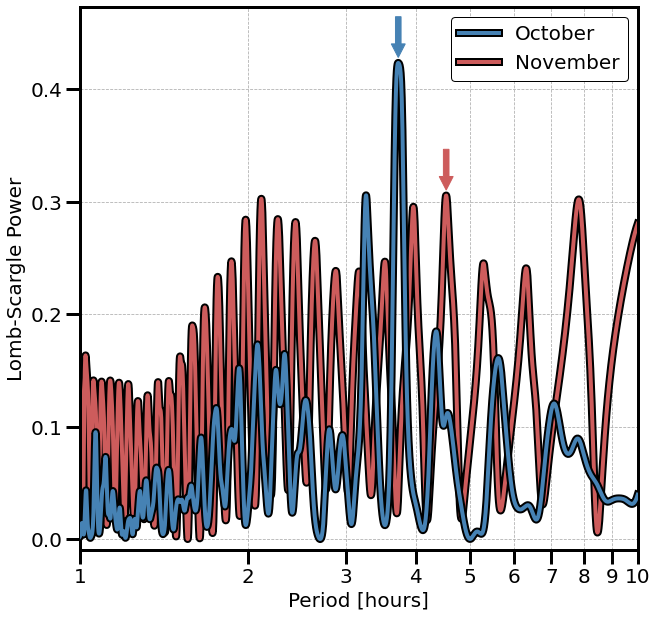

In [4]:
lsoct = LombScargle(octbeltime*24,octbelmag,octbelsig)
lsnov = LombScargle(novbeltime*24,novbelmag,novbelsig)

freqoct,powoct=lsoct.autopower(minimum_frequency=1/10,maximum_frequency=1,samples_per_peak=100)
freqnov,pownov=lsnov.autopower(minimum_frequency=1/10,maximum_frequency=1,samples_per_peak=100)

print(lsoct.false_alarm_probability(powoct.max()))
print(lsnov.false_alarm_probability(pownov.max()))

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(1/freqoct,powoct,alpha=1,color='steelblue',lw=4,label='October',zorder=3,
       path_effects=[pe.Stroke(linewidth=8, foreground='k'), pe.Normal()])
ax.plot(1/freqnov,pownov,alpha=1,color='indianred',lw=4,label='November',zorder=2,
       path_effects=[pe.Stroke(linewidth=8, foreground='k'), pe.Normal()])

trans=ax.transData + ax.transAxes.inverted()

ax.set_xlabel("Period [hours]")
ax.set_ylabel("Lomb-Scargle Power")
ax.set_xscale('log')
ax.legend(fancybox=True,edgecolor='black',facecolor='white',framealpha=1)
ax.set_xlim([1,10])
ax.set_ylim([-.01,max(powoct.max(),pownov.max())+.05])
ax.set_xticks(np.arange(1,11))
ax.grid(linestyle='dashed',zorder=1)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.f'))

arrx,arry=trans.transform((1/freqoct[powoct==powoct.max()][0],powoct.max()))
ax.arrow(arrx,arry+.085,0,-0.05, transform=ax.transAxes, color='steelblue',
         length_includes_head=False, zorder=3,width=0.01,head_width=.025,head_length=.025)

arrx,arry=trans.transform((1/freqnov[pownov==pownov.max()][0],pownov.max()))
ax.arrow(arrx,arry+.085,0,-0.05, transform=ax.transAxes, color='indianred',
         length_includes_head=False, zorder=2,width=0.01,head_width=.025,head_length=.025)

plt.savefig("../Figures and Paper/lomb_scargle_power.pdf",
           bbox_inches='tight',dpi=150)